In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')
df = df.dropna(subset=['Title'])
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


Text(0, 0.5, 'Classification')

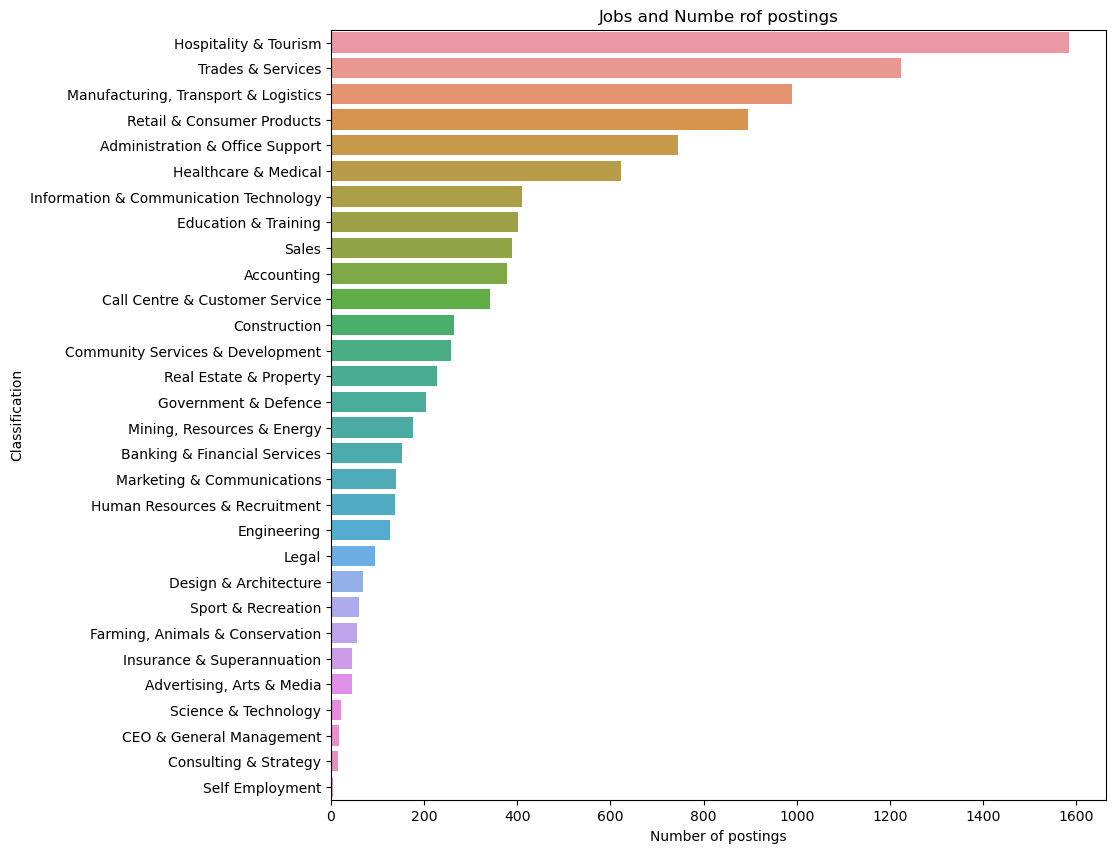

In [2]:
%matplotlib inline

by_post = df.groupby(['Classification'], as_index=False)['Id'].count().sort_values(by='Id', ascending=False)
figure = plt.figure(figsize=(10, 10))
sns.barplot(data=by_post, x=by_post.Id, y=by_post.Classification)
plt.title("Jobs and Numbe rof postings")
plt.xlabel("Number of postings")
plt.ylabel("Classification")

In [3]:
import matplotlib
#create dataframe for salary ranges
lowsalary = df.groupby(['LowestSalary'], as_index=False).count()
lowsalary['labels'] = lowsalary['LowestSalary']
lowsalary.head()


,LowestSalary,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,labels
0,0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0
1,30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0
2,40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0
3,50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0


In [4]:
highsalary = df.groupby(['HighestSalary'], as_index=False).count()
highsalary['labels'] = lowsalary['HighestSalary']
highsalary.head()

,HighestSalary,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,JobType,labels
0,30.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,3894
1,40.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,1842
2,50.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,2519
3,60.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,1844


Text(0.5, 1.0, 'Job post by salary range')

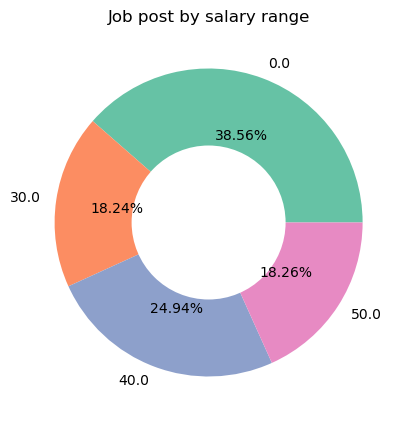

In [29]:
#salary ranges plot

import matplotlib.pyplot as plt

colours = sns.color_palette("Set2")[0:5]
fig = plt.figure(figsize=(5, 5))
plt.pie(data=lowsalary, x=lowsalary.Id, labels=lowsalary.labels, colors=colours, autopct='%0.2f%%')

centre_circle = plt.Circle((0, 0), 0.50, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Job post by salary range")

In [11]:
matplotlib.patches.Circle(xy = (lowsalary.Id, lowsalary.labels))

In [82]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


In [83]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

locationDf = locationDf.sort_values(by="Count", ascending = False)

df2 = locationDf[:5].copy()
new_row = pd.DataFrame(data={'Location' : ['others'],
                             'Count' : [locationDf['Count'][5:].sum()]
                            })

locationDf = pd.concat([df2, new_row])

Text(0.5, 1.0, 'Market share of locations')

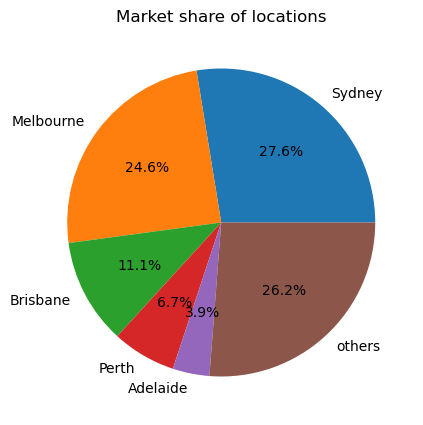

In [86]:
colors = sns.color_palette()
fig = plt.figure(figsize=(5, 5))
plt.pie(data=locationDf, x = locationDf.Count, labels= locationDf.Location, colors=colors, autopct='%0.1f%%')
plt.title("Market share of locations")